<a href="https://colab.research.google.com/github/shonkhochil/Tensorflow-Bootcamp/blob/master/TF2_0_Reg_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Tensorflow
#!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
# Load data
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)
N, D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(D,)),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
13/13 [==============================] - 0s 12ms/step - loss: 0.3111 - accuracy: 0.9121 - val_loss: 0.2701 - val_accuracy: 0.9415
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.9271 - val_loss: 0.2460 - val_accuracy: 0.9474
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.9296 - val_loss: 0.2250 - val_accuracy: 0.9591
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2498 - accuracy: 0.9397 - val_loss: 0.2072 - val_accuracy: 0.9532
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2359 - accuracy: 0.9497 - val_loss: 0.1925 - val_accuracy: 0.9591
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.2244 - accuracy: 0.9548 - val_loss: 0.1801 - val_accuracy: 0.9766
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.9598 - val_loss: 0.1698 - val_accuracy: 0.9766
Epoch 8/100


In [ ]:
print("Train Score: ", model.evaluate(X_train, y_train))
print("Test Score: ", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9849
Train Score:  [0.07642684876918793, 0.9849246144294739]
6/6 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9883
Test Score:  [0.05626595765352249, 0.988304078578949]


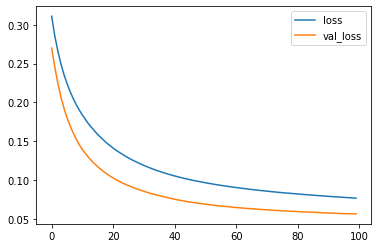

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

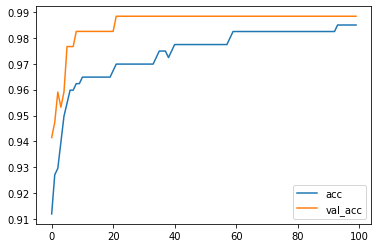

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Linear classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-08-17 14:31:19--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-08-17 14:31:20 (34.2 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [ ]:
data = pd.read_csv('moore.csv', header=None).values

In [ ]:
X = data[:, 0].reshape(-1,1)
Y = data[:,1]

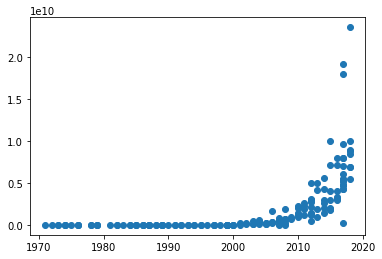

In [ ]:
plt.scatter(X,Y)

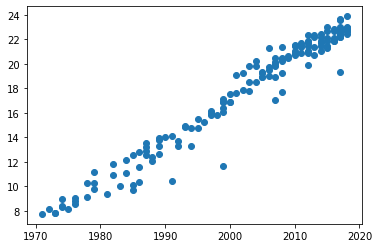

In [ ]:
Y = np.log(Y)
plt.scatter(X,Y)

In [ ]:
X = X - X.mean()

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
#model.compile(optimizer='adam', loss='mse')


# Learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 1ms/step - loss: 416.0304
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 334.4642
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 321.9578
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 218.8184
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 205.5327
Epoch 6/200
6/6 [==============================] - 0s 1ms/step - loss: 121.8052
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 98.5058
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 102.3270
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 72.5387
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 62.7007
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 31.2677
Epoch 12/200
6/6 [==============================] - 0s 1ms/step - loss: 22.5119
Epoch 13/200
6/6 [========================

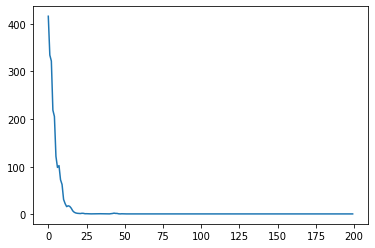

In [ ]:
plt.plot(r.history['loss'], label='loss')

In [ ]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3410767]], dtype=float32), array([17.75234], dtype=float32)]


In [ ]:
# Slope of the line
a = model.layers[0].get_weights()[0][0,0]

In [ ]:
# Time to double 
print("time to double: ", np.log(2) / a)

time to double:  2.032232564523937


In [ ]:
# Analytical solution
X = np.array(X).flatten()
Y = np.array(Y)

denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

print(a, b)
print("Time to double: ", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double:  2.0286295205239204


California Housing Data

In [ ]:
import pandas as pd
train = pd.read_csv('/content/sample_data/california_housing_train.csv')
test = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [ ]:
train.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.4900,-118.000,-114.3100
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.2500,37.720,41.9500
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.0000,37.000,52.0000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.0000,3151.250,37937.0000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.0000,648.250,6445.0000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.0000,1721.000,35682.0000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.0000,605.250,6082.0000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.5446,4.767,15.0001
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.0000,265000.000,500001.0000


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


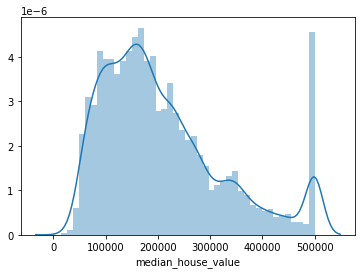

In [ ]:
sns.distplot(train['median_house_value'])

In [ ]:
train.corr()['median_house_value'].sort_values()

latitude             -0.144917
longitude            -0.044982
population           -0.027850
total_bedrooms        0.045783
households            0.061031
housing_median_age    0.106758
total_rooms           0.130991
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64

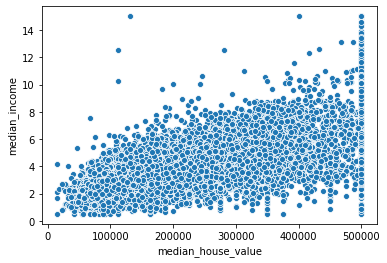

In [ ]:
sns.scatterplot(train['median_house_value'], train['median_income'], data=train)

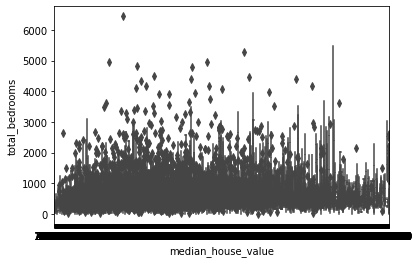

In [ ]:
sns.boxplot(train['median_house_value'], train['total_bedrooms'], data=train)

In [ ]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [ ]:
df = pd.merge(train, test, how='outer')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20000 non-null  float64
 1   latitude            20000 non-null  float64
 2   housing_median_age  20000 non-null  float64
 3   total_rooms         20000 non-null  float64
 4   total_bedrooms      20000 non-null  float64
 5   population          20000 non-null  float64
 6   households          20000 non-null  float64
 7   median_income       20000 non-null  float64
 8   median_house_value  20000 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


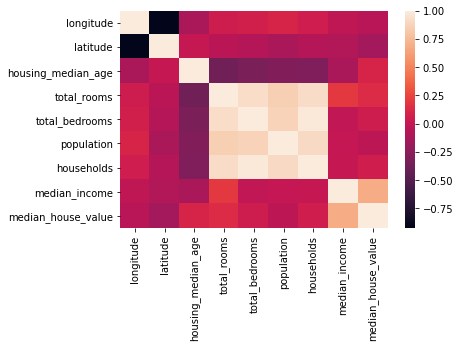

In [ ]:
corr = df.corr()
sns.heatmap(corr)

In [ ]:
df.corr()['median_house_value'].sort_values()

latitude             -0.143969
longitude            -0.045788
population           -0.024234
total_bedrooms        0.051111
households            0.066573
housing_median_age    0.104470
total_rooms           0.135298
median_income         0.689109
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [ ]:
col_drop = ['latitude', 'longitude', 'population']

df = df.drop(col_drop, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20000 non-null  float64
 1   total_rooms         20000 non-null  float64
 2   total_bedrooms      20000 non-null  float64
 3   households          20000 non-null  float64
 4   median_income       20000 non-null  float64
 5   median_house_value  20000 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [ ]:
df.corr()['median_house_value'].sort_values()

total_bedrooms        0.051111
households            0.066573
housing_median_age    0.104470
total_rooms           0.135298
median_income         0.689109
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
housing_median_age,20000.0,28.627750,12.582229,1.0000,18.0000,29.000,37.000000,52.0000
total_rooms,20000.0,2637.051550,2176.314757,2.0000,1451.0000,2126.000,3149.000000,37937.0000
total_bedrooms,20000.0,537.991800,420.631119,1.0000,296.0000,434.000,647.000000,6445.0000
households,20000.0,499.525450,381.729517,1.0000,280.0000,409.000,604.000000,6082.0000
median_income,20000.0,3.872132,1.900356,0.4999,2.5625,3.536,4.745325,15.0001
median_house_value,20000.0,207082.716750,115557.055856,14999.0000,119800.0000,179800.000,265000.000000,500001.0000


In [ ]:
X = df.drop('median_house_value', axis=1).values
y = df['median_house_value'].values

In [ ]:
print(X)

[[1.5000e+01 5.6120e+03 1.2830e+03 4.7200e+02 1.4936e+00]
 [1.9000e+01 7.6500e+03 1.9010e+03 4.6300e+02 1.8200e+00]
 [1.7000e+01 7.2000e+02 1.7400e+02 1.1700e+02 1.6509e+00]
 ...
 [1.0000e+01 9.5600e+02 2.0100e+02 2.2000e+02 2.2895e+00]
 [4.0000e+01 9.6000e+01 1.4000e+01 1.4000e+01 3.2708e+00]
 [4.2000e+01 1.7650e+03 2.6300e+02 2.6000e+02 8.5608e+00]]


In [ ]:
print(y)

[ 66900.  80100.  85700. ...  62000. 162500. 500001.]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

In [ ]:
print(X_test)

[[3.6000e+01 1.9210e+03 3.2900e+02 3.2700e+02 4.9191e+00]
 [3.0000e+01 4.6350e+03 8.0000e+02 7.5400e+02 3.6548e+00]
 [1.5000e+01 2.2060e+03 6.4800e+02 6.4800e+02 1.6348e+00]
 ...
 [2.0000e+01 1.6080e+03 2.7400e+02 2.4800e+02 4.8750e+00]
 [5.2000e+01 9.7700e+02 2.8900e+02 2.7200e+02 2.1250e+00]
 [2.7000e+01 1.4170e+03 3.7300e+02 3.4800e+02 2.3603e+00]]


In [ ]:
print(X_train.shape)
print(X_test.shape)

(14000, 5)
(6000, 5)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=200)

Epoch 1/200
110/110 [==============================] - 0s 2ms/step - loss: 56485163008.0000 - val_loss: 55649308672.0000
Epoch 2/200
110/110 [==============================] - 0s 2ms/step - loss: 56460136448.0000 - val_loss: 55577866240.0000
Epoch 3/200
110/110 [==============================] - 0s 1ms/step - loss: 56253128704.0000 - val_loss: 55165472768.0000
Epoch 4/200
110/110 [==============================] - 0s 1ms/step - loss: 55472263168.0000 - val_loss: 53922160640.0000
Epoch 5/200
110/110 [==============================] - 0s 2ms/step - loss: 53560160256.0000 - val_loss: 51252645888.0000
Epoch 6/200
110/110 [==============================] - 0s 2ms/step - loss: 49950384128.0000 - val_loss: 46675156992.0000
Epoch 7/200
110/110 [==============================] - 0s 2ms/step - loss: 44328046592.0000 - val_loss: 40110497792.0000
Epoch 8/200
110/110 [==============================] - 0s 2ms/step - loss: 36921774080.0000 - val_loss: 32123035648.0000
Epoch 9/200
110/110 [===========

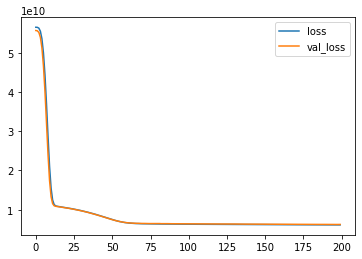

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
prediction = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, prediction)

58631.798721354164

In [ ]:
np.sqrt(mean_squared_error(y_test, prediction))

79037.82669699349

In [ ]:
print(df['median_house_value'].mean())
print(df['median_house_value'].median())

207082.71675
179800.0


In [ ]:
explained_variance_score(y_test, prediction)

0.5314093981077102

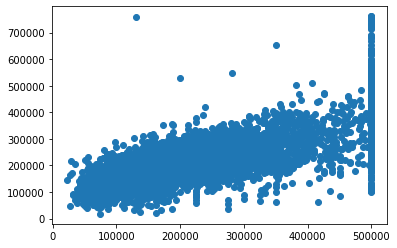

In [ ]:
plt.scatter(y_test, prediction)

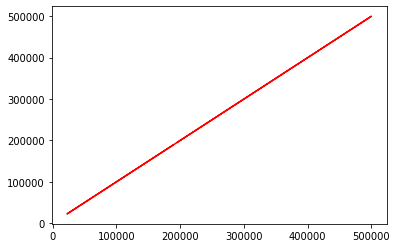

In [ ]:
plt.plot(y_test, y_test, 'r')

In [ ]:
# Classification Breast Cancer Data
# Load data
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer()

In [ ]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
X = df.data
y = df.target

In [ ]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=200,
          validation_data=(X_test, y_test),
          verbose = 1)

Epoch 1/200
14/14 [==============================] - 0s 9ms/step - loss: 0.6818 - val_loss: 0.6527
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6385 - val_loss: 0.6197
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 0.6010 - val_loss: 0.5857
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5664 - val_loss: 0.5481
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 0.5266 - val_loss: 0.5052
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4818 - val_loss: 0.4605
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4387 - val_loss: 0.4140
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3950 - val_loss: 0.3731
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3556 - val_loss: 0.3332
Epoch 10/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3206 - val_loss: 0.2987
Epoch 11/

In [ ]:
model_loss = pd.DataFrame(model.history.history)

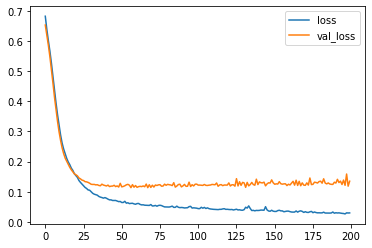

In [ ]:
model_loss.plot()

In [ ]:
# Early Stopping -- stop early when model stops improving
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=500,
          validation_data = (X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 0s 10ms/step - loss: 0.6969 - val_loss: 0.6835
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6615 - val_loss: 0.6470
Epoch 3/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6215 - val_loss: 0.6041
Epoch 4/500
14/14 [==============================] - 0s 4ms/step - loss: 0.5743 - val_loss: 0.5552
Epoch 5/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5239 - val_loss: 0.5029
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4744 - val_loss: 0.4518
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4241 - val_loss: 0.4044
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 0.3814 - val_loss: 0.3601
Epoch 9/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3407 - val_loss: 0.3234
Epoch 10/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3065 - val_loss: 0.2909
Epoch 11

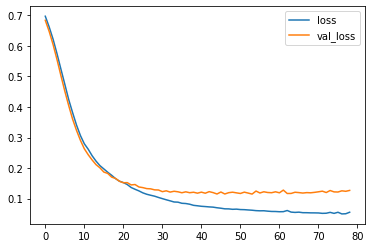

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# Adding dropout layers
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=500,
          validation_data = (X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/500
14/14 [==============================] - 0s 9ms/step - loss: 0.6975 - val_loss: 0.6805
Epoch 2/500
14/14 [==============================] - 0s 3ms/step - loss: 0.6713 - val_loss: 0.6573
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6607 - val_loss: 0.6374
Epoch 4/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6365 - val_loss: 0.6134
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 0.6087 - val_loss: 0.5804
Epoch 6/500
14/14 [==============================] - 0s 2ms/step - loss: 0.5812 - val_loss: 0.5463
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5598 - val_loss: 0.5148
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 0.5271 - val_loss: 0.4746
Epoch 9/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4772 - val_loss: 0.4323
Epoch 10/500
14/14 [==============================] - 0s 3ms/step - loss: 0.4663 - val_loss: 0.3983
Epoch 11/

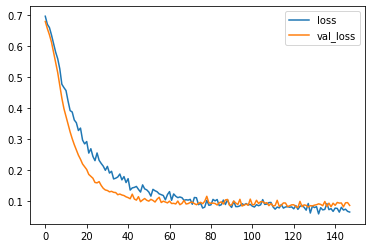

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
# Model Evaluation
predictions = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.38      1.00      0.56        55
           1       0.00      0.00      0.00        88

    accuracy                           0.38       143
   macro avg       0.19      0.50      0.28       143
weighted avg       0.15      0.38      0.21       143



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test, predictions))

[[55  0]
 [88  0]]


Lending Club Project


In [ ]:
import pandas as pd
data_info = pd.read_csv('/content/sample_data/lending_club_info.csv', index_col='LoanStatNew')

In [ ]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [ ]:
data_info.loc['grade']['Description']

'LC assigned loan grade'

In [ ]:
def feat_info(col_name):
  print(data_info.loc[col_name]['Description'])

In [ ]:
feat_info('mort_acc')

Number of mortgage accounts.


In [ ]:
df = pd.read_csv('/content/sample_data/lending_club_loan_two.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20681 entries, 0 to 20680
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             20681 non-null  float64
 1   term                  20681 non-null  object 
 2   int_rate              20681 non-null  float64
 3   installment           20681 non-null  float64
 4   grade                 20681 non-null  object 
 5   sub_grade             20681 non-null  object 
 6   emp_title             19502 non-null  object 
 7   emp_length            19727 non-null  object 
 8   home_ownership        20680 non-null  object 
 9   annual_inc            20680 non-null  float64
 10  verification_status   20680 non-null  object 
 11  issue_d               20680 non-null  object 
 12  loan_status           20680 non-null  object 
 13  purpose               20680 non-null  object 
 14  title                 20595 non-null  object 
 15  dti                

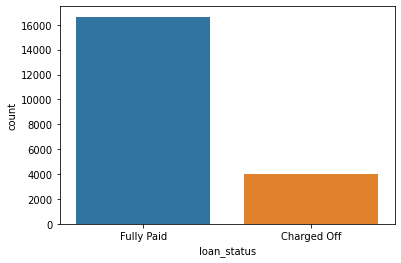

In [ ]:
import seaborn as sns
sns.countplot(x='loan_status', data=df)

(0.0, 45000.0)

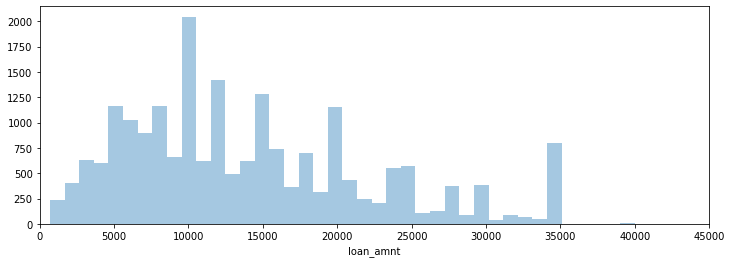

In [ ]:

plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)
plt.xlim(0,45000)

(10.0, 0.0)

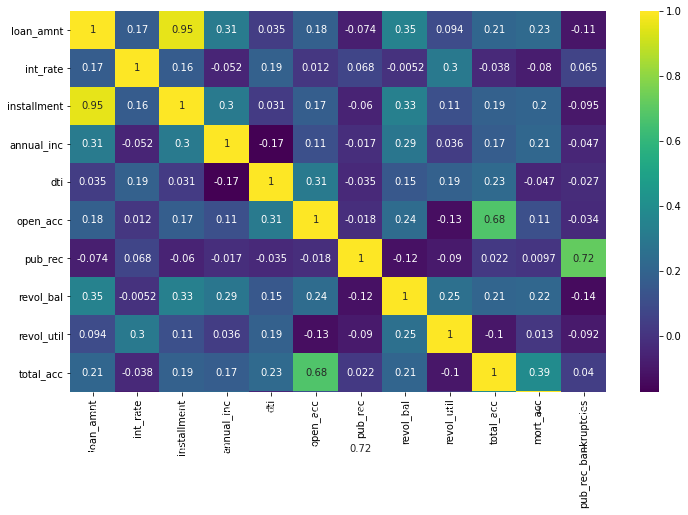

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

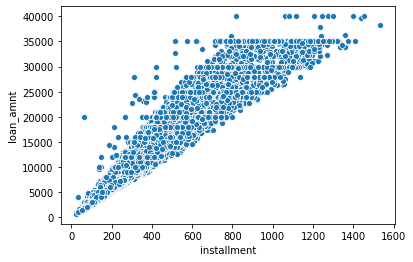

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

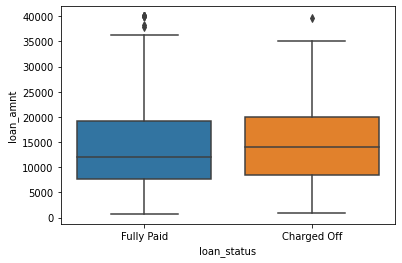

In [ ]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4041.0,15107.646622,8455.620933,1000.0,8500.0,14000.0,20000.0,39700.0
Fully Paid,16639.0,13863.005589,8298.946479,700.0,7700.0,12000.0,19200.0,40000.0


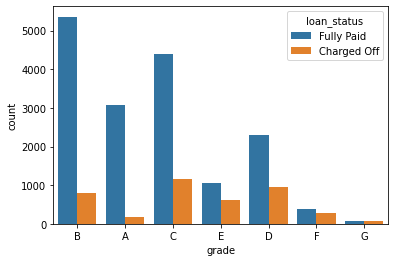

In [ ]:
sns.countplot(x='grade',data=df,hue='loan_status')

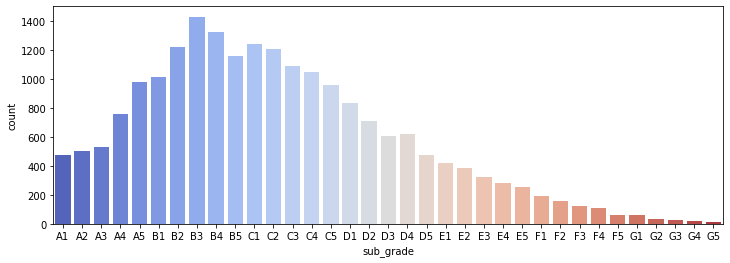

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

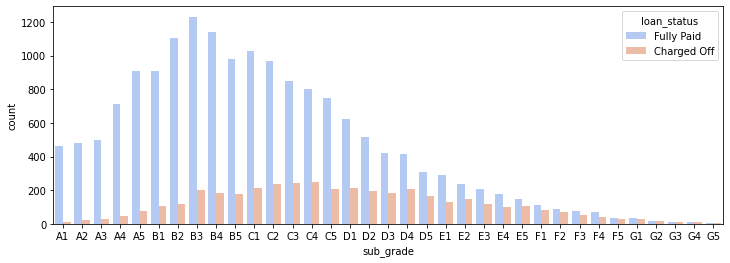

In [ ]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

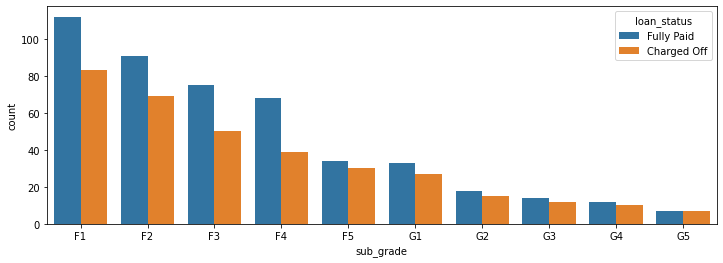

In [ ]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [ ]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               1179
emp_length               954
home_ownership             1
annual_inc                 1
verification_status        1
issue_d                    1
loan_status                1
purpose                    1
title                     86
dti                        1
earliest_cr_line           1
open_acc                   1
pub_rec                    1
revol_bal                  1
revol_util                13
total_acc                  1
initial_list_status        1
application_type           1
mort_acc                1885
pub_rec_bankruptcies      30
address                    1
dtype: int64

In [ ]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.170800,0.954454,0.310814,0.035345,0.181577,-0.073907,0.345338,0.093876,0.209015,0.228661,-0.105716
int_rate,0.170800,1.000000,0.163644,-0.052072,0.188310,0.012493,0.067637,-0.005229,0.300568,-0.038335,-0.079908,0.065223
installment,0.954454,0.163644,1.000000,0.304729,0.031140,0.171746,-0.059836,0.332959,0.114986,0.186600,0.200868,-0.094562
annual_inc,0.310814,-0.052072,0.304729,1.000000,-0.171840,0.113357,-0.017359,0.287337,0.035910,0.168026,0.214909,-0.046862
dti,0.035345,0.188310,0.031140,-0.171840,1.000000,0.306688,-0.035308,0.146389,0.189309,0.229270,-0.047373,-0.026972
open_acc,0.181577,0.012493,0.171746,0.113357,0.306688,1.000000,-0.017981,0.235776,-0.129008,0.675607,0.113243,-0.034154
pub_rec,-0.073907,0.067637,-0.059836,-0.017359,-0.035308,-0.017981,1.000000,-0.118534,-0.090500,0.021862,0.009681,0.717374
revol_bal,0.345338,-0.005229,0.332959,0.287337,0.146389,0.235776,-0.118534,1.000000,0.254800,0.205901,0.215504,-0.135882
revol_util,0.093876,0.300568,0.114986,0.035910,0.189309,-0.129008,-0.090500,0.254800,1.000000,-0.102314,0.013065,-0.092176
total_acc,0.209015,-0.038335,0.186600,0.168026,0.229270,0.675607,0.021862,0.205901,-0.102314,1.000000,0.387274,0.040157


Code Along - Regression Keras : Udemy Jose TF2.0

In [ ]:
housing = pd.read_csv('/content/sample_data/kc_house_data.csv')

In [ ]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


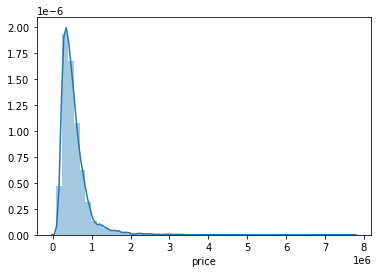

In [ ]:
sns.distplot(housing['price'])

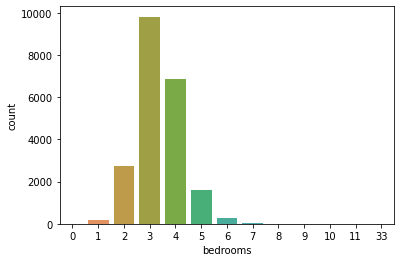

In [ ]:
sns.countplot(housing['bedrooms'])

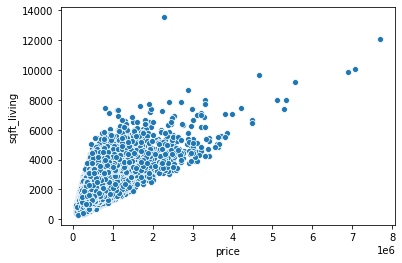

In [ ]:
sns.scatterplot(x='price', y='sqft_living', data=housing)

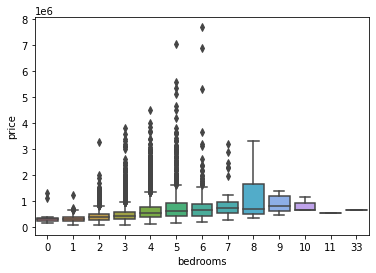

In [ ]:
sns.boxplot(x='bedrooms', y='price', data=housing)

In [ ]:
housing = housing.drop('id', axis=1)

In [ ]:
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Feature Engineering

In [ ]:
housing['date'] = pd.to_datetime(housing['date'])

In [ ]:
housing['month'] = housing['date'].apply(lambda x : x.month)

In [ ]:
housing['year'] = housing['date'].apply(lambda x : x.year)

In [ ]:
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


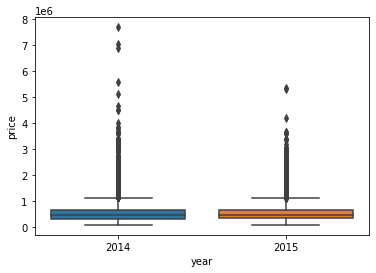

In [ ]:
sns.boxplot(x='year', y='price', data=housing)

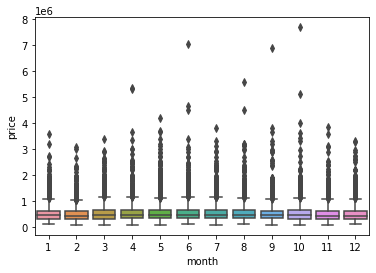

In [ ]:
sns.boxplot(x='month', y='price', data=housing)

In [ ]:
housing = housing.drop('date', axis=1)

Train Test Splits

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = housing.drop('price', axis=1)
y = housing['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creating Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train.values,
          validation_data=(X_test, y_test.values),
          batch_size=100, epochs=200)

Epoch 1/200
152/152 [==============================] - 0s 2ms/step - loss: 423615430656.0000 - val_loss: 432971874304.0000
Epoch 2/200
152/152 [==============================] - 0s 2ms/step - loss: 422893518848.0000 - val_loss: 431043182592.0000
Epoch 3/200
152/152 [==============================] - 0s 2ms/step - loss: 417942601728.0000 - val_loss: 421386518528.0000
Epoch 4/200
152/152 [==============================] - 0s 2ms/step - loss: 400066117632.0000 - val_loss: 392910176256.0000
Epoch 5/200
152/152 [==============================] - 0s 2ms/step - loss: 358966788096.0000 - val_loss: 337618632704.0000
Epoch 6/200
152/152 [==============================] - 0s 2ms/step - loss: 291994861568.0000 - val_loss: 259847307264.0000
Epoch 7/200
152/152 [==============================] - 0s 2ms/step - loss: 212218150912.0000 - val_loss: 181663170560.0000
Epoch 8/200
152/152 [==============================] - 0s 2ms/step - loss: 146524602368.0000 - val_loss: 130525954048.0000
Epoch 9/200
152/

In [ ]:
losses = pd.DataFrame(model.history.history)
print(losses)

             loss      val_loss
0    4.236154e+11  4.329719e+11
1    4.228935e+11  4.310432e+11
2    4.179426e+11  4.213865e+11
3    4.000661e+11  3.929102e+11
4    3.589668e+11  3.376186e+11
..            ...           ...
195  3.266533e+10  3.209466e+10
196  3.263264e+10  3.204120e+10
197  3.259646e+10  3.204672e+10
198  3.255625e+10  3.196729e+10
199  3.252778e+10  3.193125e+10

[200 rows x 2 columns]


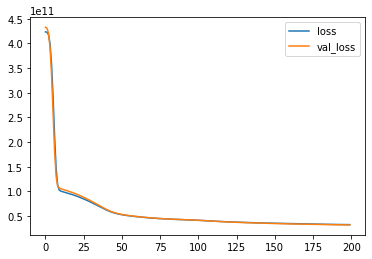

In [ ]:
losses.plot()

Evaluation of Model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test, predictions)

111292.28526167778

In [ ]:
np.sqrt(mean_squared_error(y_test, predictions))

178693.1896582496

In [ ]:
explained_variance_score(y_test, predictions)

0.7723694287680642

In [ ]:
housing['price'].mean()

540088.1417665294

In [ ]:
housing['price'].median()

450000.0

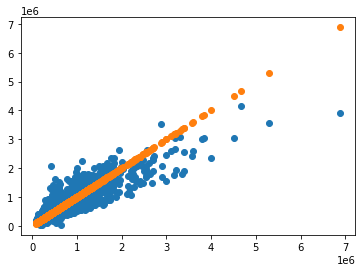

In [ ]:
plt.scatter(y_test, predictions)
plt.scatter(y_test, y_test)
plt.show()

In [ ]:
len(y_test)

6484

In [ ]:
errors = y_test.values.reshape(6484, 1) - predictions

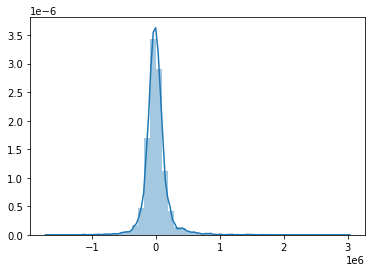

In [ ]:
sns.distplot(errors)

Predicting on a brand new house

In [ ]:
single_house = housing.drop('price', axis=1).iloc[0]

In [ ]:
single_house

bedrooms             3.0000
bathrooms            1.0000
sqft_living       1180.0000
sqft_lot          5650.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            3.0000
grade                7.0000
sqft_above        1180.0000
sqft_basement        0.0000
yr_built          1955.0000
yr_renovated         0.0000
zipcode          98178.0000
lat                 47.5112
long              -122.2570
sqft_living15     1340.0000
sqft_lot15        5650.0000
month               10.0000
year              2014.0000
Name: 0, dtype: float64

In [ ]:
single_house = scaler.transform(single_house.values.reshape(-1, 20))
single_house

array([[0.27272727, 0.125     , 0.06716981, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.5       , 0.09758772,
        0.        , 0.47826087, 0.        , 0.89393939, 0.57149751,
        0.21760797, 0.16193426, 0.00573322, 0.81818182, 0.        ]])

In [ ]:
model.predict(single_house)

array([[249548.55]], dtype=float32)

In [ ]:
housing.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
zipcode           98178.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64

Classification : Udemy TF2.0 Jose Bootcamp

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/sample_data/cancer_classification.csv')

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


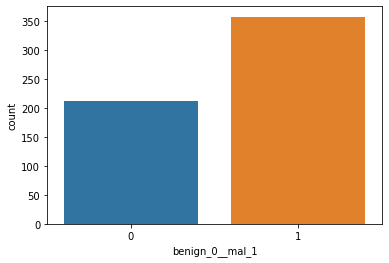

In [ ]:
sns.countplot(x='benign_0__mal_1', data=df)

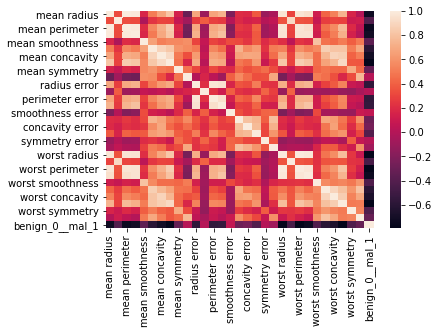

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

Train Test Split

In [ ]:
X = df.drop('benign_0__mal_1', axis=1)
y = df['benign_0__mal_1']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Creating Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam')

Training Model

In [ ]:
model.fit(x=X_train, y=y_train, epochs=500,
          validation_data=(X_test, y_test), verbose=1)

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 0.6901 - val_loss: 0.6793
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6664 - val_loss: 0.6533
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6368 - val_loss: 0.6269
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6078 - val_loss: 0.5971
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5745 - val_loss: 0.5619
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5355 - val_loss: 0.5241
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4943 - val_loss: 0.4826
Epoch 8/500
13/13 [==============================] - 0s 2ms/step - loss: 0.4504 - val_loss: 0.4396
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4067 - val_loss: 0.3972
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3642 - val_loss: 0.3574
Epoch 11/

In [ ]:
model_loss = pd.DataFrame(model.history.history)
print(model_loss)

         loss  val_loss
0    0.690071  0.679289
1    0.666405  0.653312
2    0.636804  0.626921
3    0.607828  0.597143
4    0.574487  0.561936
..        ...       ...
495  0.007504  0.345698
496  0.007041  0.346793
497  0.006993  0.351777
498  0.006529  0.349559
499  0.006316  0.352573

[500 rows x 2 columns]


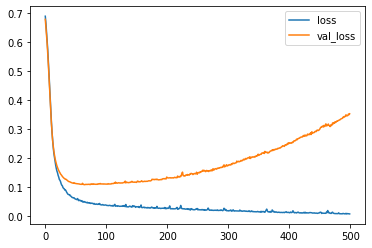

In [ ]:
model_loss.plot()

Early Stopping

In [ ]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dense(units=15, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, y=y_train, epochs=500,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/500
13/13 [==============================] - 0s 9ms/step - loss: 0.6765 - val_loss: 0.6609
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6465 - val_loss: 0.6366
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.6160 - val_loss: 0.6062
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5809 - val_loss: 0.5714
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.5434 - val_loss: 0.5341
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4974 - val_loss: 0.4870
Epoch 7/500
13/13 [==============================] - 0s 3ms/step - loss: 0.4466 - val_loss: 0.4404
Epoch 8/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3998 - val_loss: 0.3961
Epoch 9/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3554 - val_loss: 0.3558
Epoch 10/500
13/13 [==============================] - 0s 3ms/step - loss: 0.3166 - val_loss: 0.3220
Epoch 11/

In [ ]:
model_loss = pd.DataFrame(model.history.history)
print(model_loss)

         loss  val_loss
0    0.676540  0.660947
1    0.646527  0.636611
2    0.615993  0.606222
3    0.580876  0.571358
4    0.543378  0.534059
..        ...       ...
117  0.034379  0.127392
118  0.040965  0.130746
119  0.035598  0.126725
120  0.034180  0.127555
121  0.032535  0.127638

[122 rows x 2 columns]


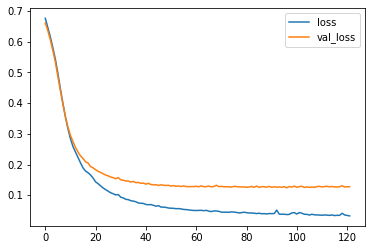

In [ ]:
model_loss.plot()

Adding Dropout Layers

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model = Sequential()

model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 10ms/step - loss: 0.7035 - val_loss: 0.6728
Epoch 2/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6880 - val_loss: 0.6476
Epoch 3/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6536 - val_loss: 0.6270
Epoch 4/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6451 - val_loss: 0.6117
Epoch 5/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6416 - val_loss: 0.5936
Epoch 6/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6057 - val_loss: 0.5749
Epoch 7/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5918 - val_loss: 0.5525
Epoch 8/600
13/13 [==============================] - 0s 3ms/step - loss: 0.6009 - val_loss: 0.5364
Epoch 9/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5496 - val_loss: 0.5123
Epoch 10/600
13/13 [==============================] - 0s 3ms/step - loss: 0.5465 - val_loss: 0.4848
Epoch 11

In [ ]:
model_loss = pd.DataFrame(model.history.history)

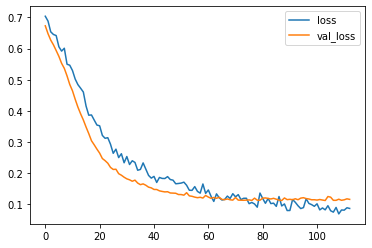

In [ ]:
model_loss.plot()

Model Evaluation

In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 66   0]
 [105   0]]


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56        66
           1       0.00      0.00      0.00       105

    accuracy                           0.39       171
   macro avg       0.19      0.50      0.28       171
weighted avg       0.15      0.39      0.21       171



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kears : Project Exercise : Udemy TF2.0 Jose

In [ ]:
data_info = pd.read_csv('/content/sample_data/lending_club_info.csv', index_col='LoanStatNew')
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [ ]:
df = pd.read_csv('/content/sample_data/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Data Preprocessing

In [ ]:
len(df)

20681

In [ ]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               1179
emp_length               954
home_ownership             1
annual_inc                 1
verification_status        1
issue_d                    1
loan_status                1
purpose                    1
title                     86
dti                        1
earliest_cr_line           1
open_acc                   1
pub_rec                    1
revol_bal                  1
revol_util                13
total_acc                  1
initial_list_status        1
application_type           1
mort_acc                1885
pub_rec_bankruptcies      30
address                    1
dtype: int64

In [ ]:
df = df.drop('emp_title', axis=1)

In [ ]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [ ]:
df = df.drop('emp_length', axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             1
annual_inc                 1
verification_status        1
issue_d                    1
loan_status                1
purpose                    1
title                     86
dti                        1
earliest_cr_line           1
open_acc                   1
pub_rec                    1
revol_bal                  1
revol_util                13
total_acc                  1
initial_list_status        1
application_type           1
mort_acc                1885
pub_rec_bankruptcies      30
address                    1
dtype: int64

In [ ]:
df = df.drop('title', axis=1)

In [ ]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.079908
dti                    -0.047373
pub_rec                 0.009681
revol_util              0.013065
pub_rec_bankruptcies    0.032117
open_acc                0.113243
installment             0.200868
annual_inc              0.214909
revol_bal               0.215504
loan_amnt               0.228661
total_acc               0.387274
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df = df.dropna(axis=0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18786 entries, 0 to 20679
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             18786 non-null  float64
 1   term                  18786 non-null  object 
 2   int_rate              18786 non-null  float64
 3   installment           18786 non-null  float64
 4   grade                 18786 non-null  object 
 5   sub_grade             18786 non-null  object 
 6   home_ownership        18786 non-null  object 
 7   annual_inc            18786 non-null  float64
 8   verification_status   18786 non-null  object 
 9   issue_d               18786 non-null  object 
 10  loan_status           18786 non-null  object 
 11  purpose               18786 non-null  object 
 12  dti                   18786 non-null  float64
 13  earliest_cr_line      18786 non-null  object 
 14  open_acc              18786 non-null  float64
 15  pub_rec            

In [ ]:
df['mort_acc'].value_counts()

0.0     7455
1.0     3164
2.0     2610
3.0     1941
4.0     1426
5.0      935
6.0      612
7.0      306
8.0      161
9.0       86
10.0      45
11.0      16
12.0      15
14.0       4
13.0       3
19.0       2
15.0       2
34.0       1
25.0       1
22.0       1
Name: mort_acc, dtype: int64

In [ ]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
print(total_acc_avg)

total_acc
3.0      0.000000
4.0      0.130435
5.0      0.111111
6.0      0.184874
7.0      0.247312
           ...   
91.0     0.000000
97.0     5.000000
104.0    8.000000
105.0    6.000000
108.0    0.000000
Name: mort_acc, Length: 88, dtype: float64


In [ ]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [ ]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

Categorical Variables

In [ ]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [ ]:
df = df.drop('grade', axis=1)

In [ ]:
subgrade_dummies = pd.get_dummies(df['sub_grade'], drop_first=True)

In [ ]:
df = pd.concat([df.drop('sub_grade', axis=1), subgrade_dummies], axis=1)

In [ ]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    9422
RENT        7536
OWN         1825
OTHER          2
ANY            1
Name: home_ownership, dtype: int64

In [ ]:
df['home_ownership'] = df['home_ownership'].replace(['ANY'], 'OTHER')

In [ ]:
dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = df.drop('home_ownership', axis=1)
df = pd.concat([df, dummies], axis=1)

In [ ]:
df['zip_code'] = df['address'].apply(lambda address: address[-5:])

In [ ]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [ ]:
df = df.drop('issue_d',axis=1)

In [ ]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [ ]:
df.select_dtypes(['object']).columns

Index(['verification_status', 'loan_status', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = df.drop('loan_status', axis=1)

In [ ]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

KeyError: ignored